----
# Data Loading
----

## Set Up
---

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

## Loading data from CSVs
---

In [2]:
msft_df = pd.read_csv('../../data/MSFT.csv')

In [3]:
msft_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-29,141.500000,141.509995,139.369995,141.029999,134.499710,16605900
1,2019-07-30,140.139999,141.220001,139.800003,140.350006,133.851212,16846500
2,2019-07-31,140.330002,140.490005,135.080002,136.270004,129.960098,38598800
3,2019-08-01,137.000000,140.940002,136.929993,138.059998,131.667221,40557500
4,2019-08-02,138.089996,138.320007,135.259995,136.899994,130.560913,30791600


In [4]:
msft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [5]:
msft_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,270.124051,272.823686,267.323260,270.213598,265.489348,2.884281e+07
std,79.997355,80.379436,79.488907,80.002796,81.613239,1.256351e+07
min,133.300003,133.929993,130.779999,132.210007,126.088127,8.122076e+06
25%,214.029999,216.230004,212.114998,214.230003,207.604942,2.095990e+07
50%,260.579987,264.690002,257.820007,261.500000,256.389008,2.572550e+07
75%,323.985001,327.279999,320.705002,323.750000,320.327195,3.312505e+07
max,467.000000,468.350006,464.459991,467.559998,467.559998,9.701270e+07


## Set date column to index
------

In [6]:
msft_df['Date'] = pd.to_datetime(msft_df['Date'])

In [7]:
msft_df['Date']

0      2019-07-29
1      2019-07-30
2      2019-07-31
3      2019-08-01
4      2019-08-02
          ...    
1254   2024-07-23
1255   2024-07-24
1256   2024-07-25
1257   2024-07-26
1258   2024-07-29
Name: Date, Length: 1259, dtype: datetime64[ns]

In [10]:
msft_df = msft_df.set_index('Date')

In [11]:
msft_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-29,141.500000,141.509995,139.369995,141.029999,134.499710,16605900
2019-07-30,140.139999,141.220001,139.800003,140.350006,133.851212,16846500
2019-07-31,140.330002,140.490005,135.080002,136.270004,129.960098,38598800
2019-08-01,137.000000,140.940002,136.929993,138.059998,131.667221,40557500
2019-08-02,138.089996,138.320007,135.259995,136.899994,130.560913,30791600
...,...,...,...,...,...,...
2024-07-23,443.899994,448.390015,443.100006,444.850006,444.850006,13107100
2024-07-24,440.450012,441.480011,427.589996,428.899994,428.899994,26805800
2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800


## Data Visualisation
-----

In [20]:
msft_df[msft_df.columns]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-29,141.500000,141.509995,139.369995,141.029999,134.499710,16605900
2019-07-30,140.139999,141.220001,139.800003,140.350006,133.851212,16846500
2019-07-31,140.330002,140.490005,135.080002,136.270004,129.960098,38598800
2019-08-01,137.000000,140.940002,136.929993,138.059998,131.667221,40557500
2019-08-02,138.089996,138.320007,135.259995,136.899994,130.560913,30791600
...,...,...,...,...,...,...
2024-07-23,443.899994,448.390015,443.100006,444.850006,444.850006,13107100
2024-07-24,440.450012,441.480011,427.589996,428.899994,428.899994,26805800
2024-07-25,428.799988,429.799988,417.510010,418.399994,418.399994,29943800


In [21]:
to_plot = ['Open','Close','High', 'Low']

In [24]:
# add lines for each column
fig = px.line(msft_df, x=msft_df.index, y=to_plot)

# axis labels and title
fig.update_layout(
    yaxis_title="Price", 
    legend_title="", 
    title="Daily Stock Prices: Open, High, Low, Close from 2019 to 2024"
)

# activate slider
fig.update_xaxes(rangeslider_visible=True)


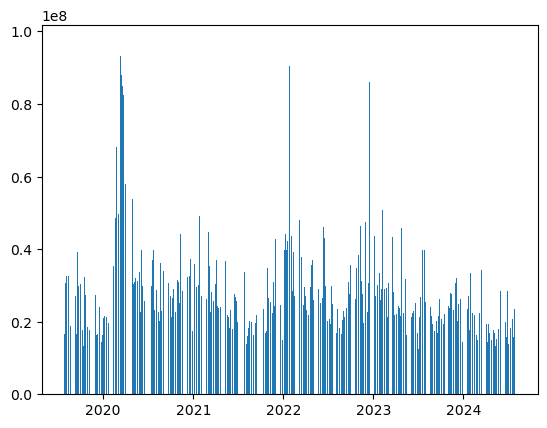

In [27]:
plt.bar(msft_df.index, msft_df['Volume'])
plt.show()

In [45]:
year_vol = msft_df[['Volume']].resample('Y').sum()

In [46]:
year_vol

,Volume
Date,
2019-12-31,2521276500
2020-12-31,9527876900
2021-12-31,6555279200
2022-12-31,7836049700
2023-12-31,6918889900
2024-12-31,2953722976


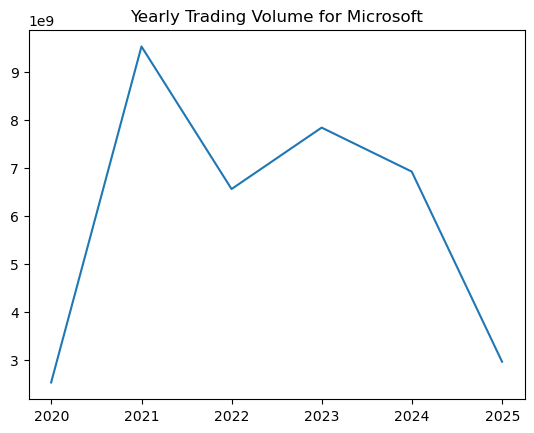

In [48]:
plt.plot(year_vol.index,  year_vol)
plt.title('Yearly Trading Volume for Microsoft')
plt.show()


## Saving dataframe
----

In [50]:
msft_df.to_csv('../../data/microsoft_data.csv')

TODOs

- add plot descriptions
- add intro/conc
- change name of file